# Pokemon

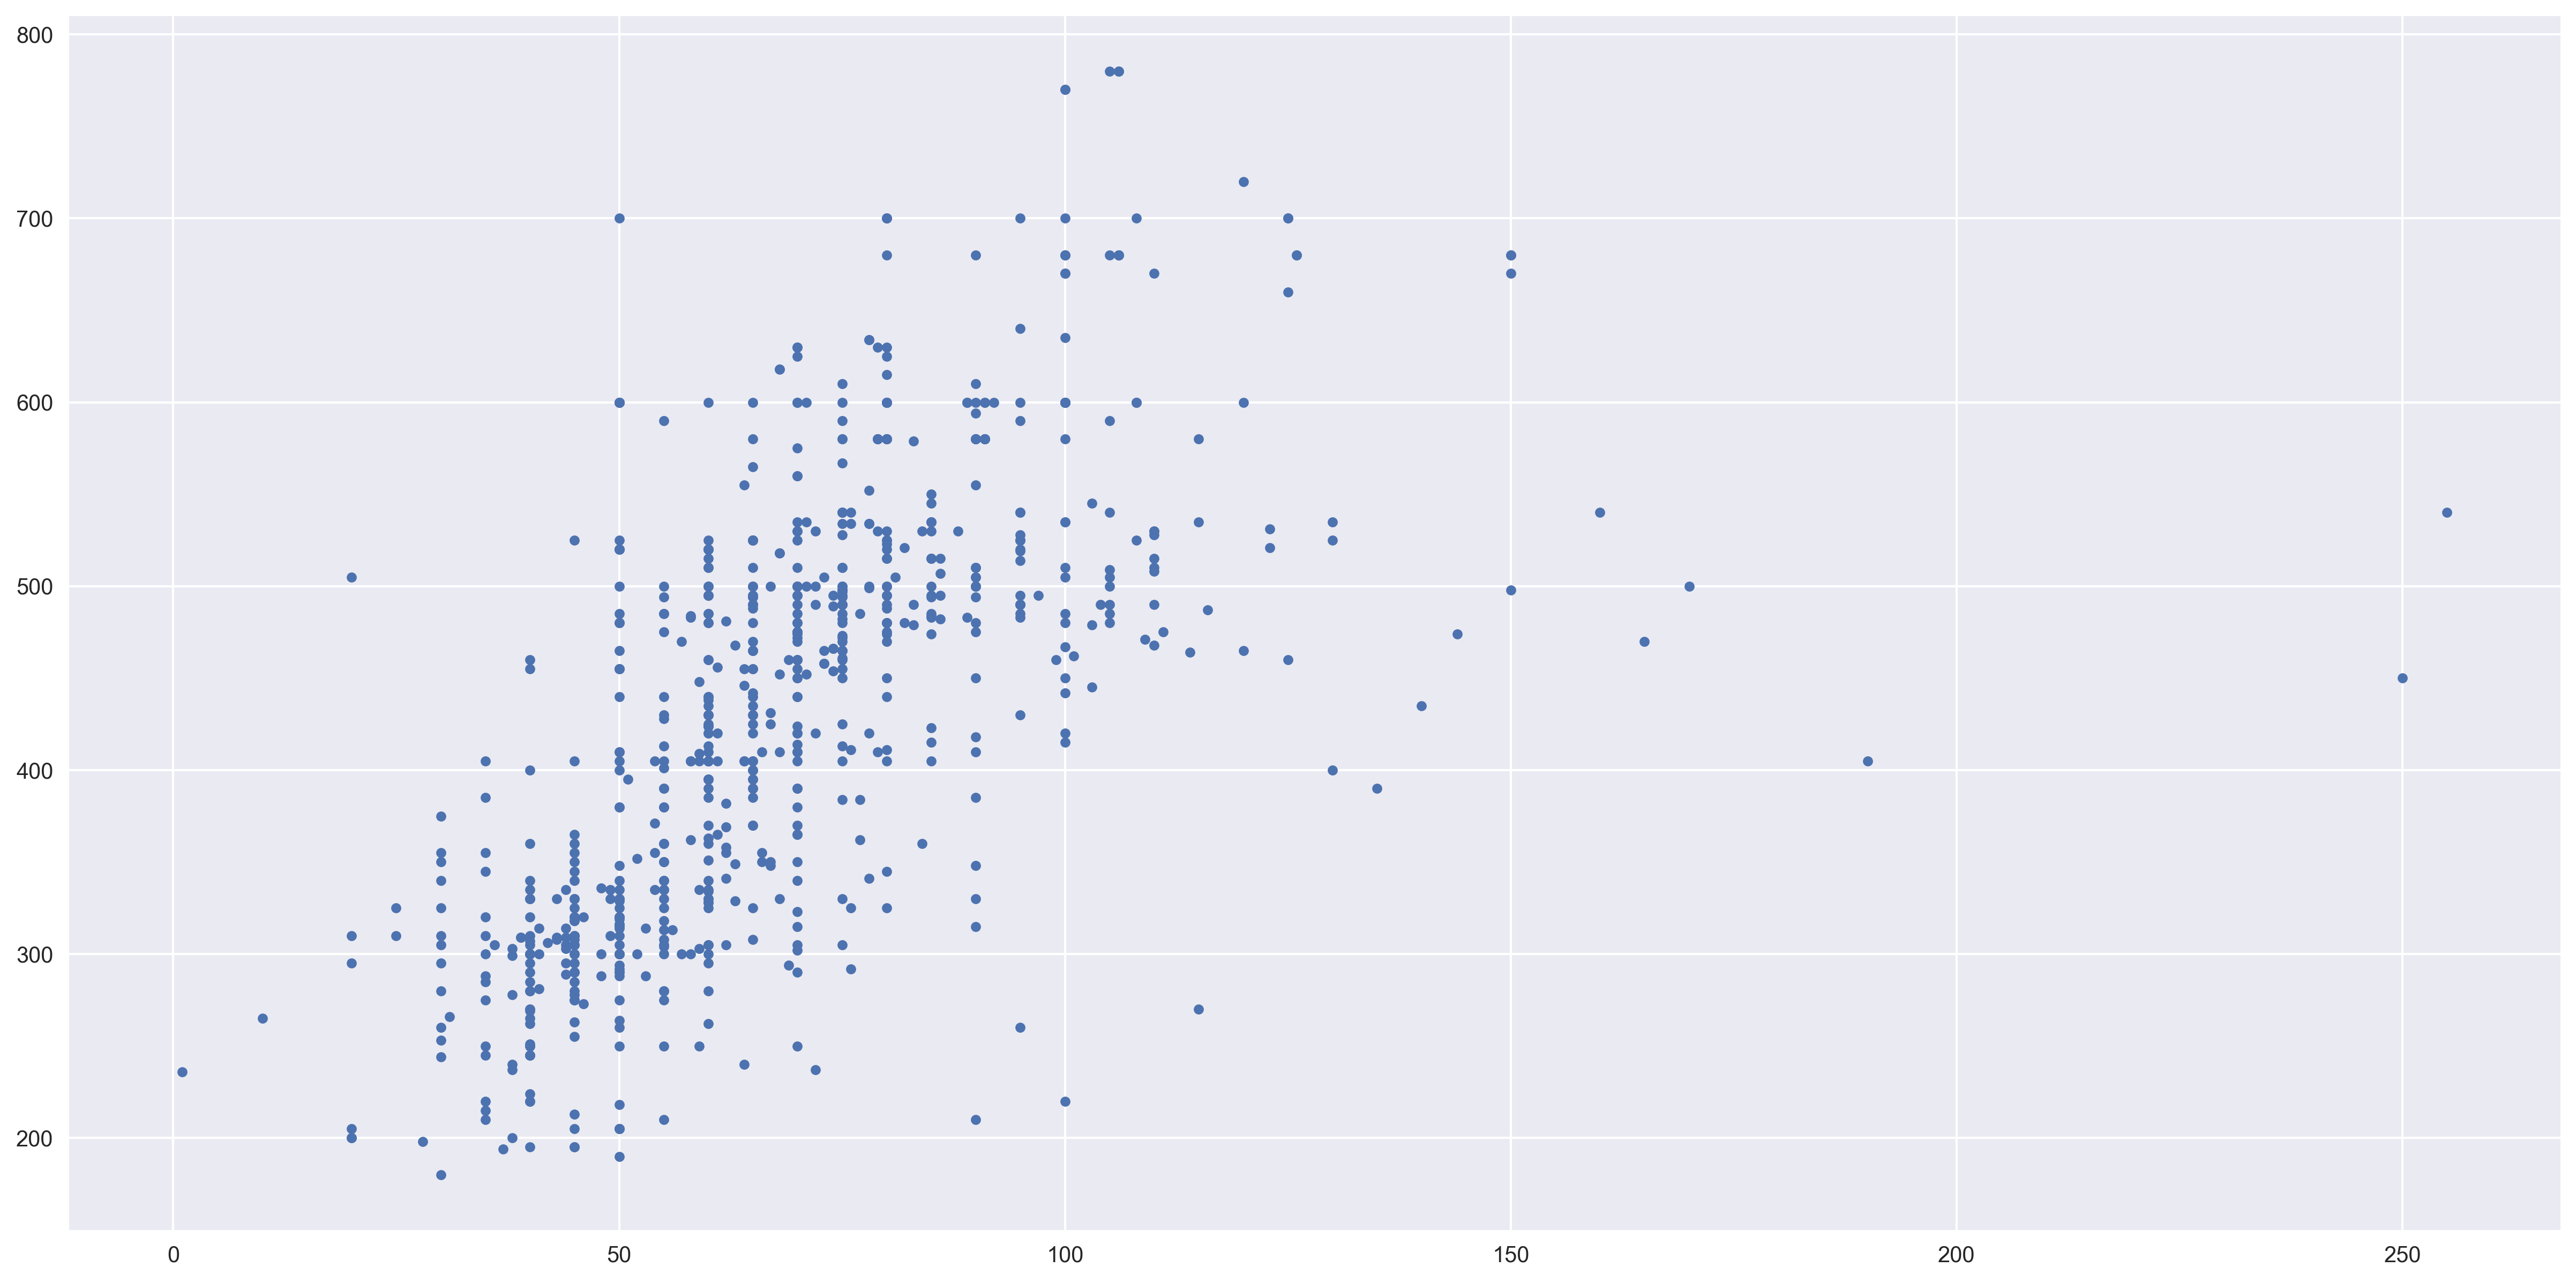

In [129]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



data_frame = pd.read_csv("data sets/Pokemon.csv")

data_frame = data_frame.drop("Type 2",axis=1).drop("Legendary",axis=1).drop("Name",axis=1).drop("#",axis=1)

col_header = list(data_frame)

plt.figure(figsize=(20,10),dpi=300)
plt.scatter(data_frame['HP'],data_frame['Total'],linewidths=1,marker=".")
#plt.savefig("s.jpg",dpi=3000)
plt.show()



# Name: Name of each pokemon
# Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
# Type 2: Some pokemon are dual type and have 2
# Total: sum of all stats that come after this, a general guide to how strong a pokemon is
# HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
# Attack: the base modifier for normal attacks (eg. Scratch, Punch)
# Defense: the base damage resistance against normal attacks
# SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
# SP Def: the base damage resistance against special attacks
# Speed: determines which pokemon attacks first each round


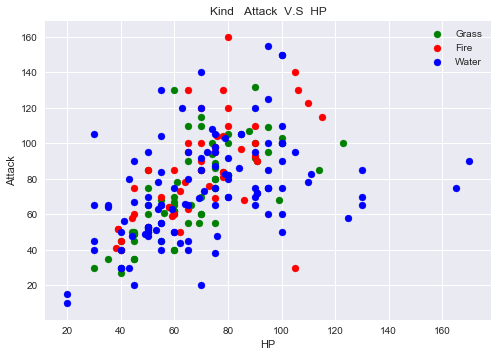

In [2]:

jet=plt.get_cmap('coolwarm')


kinds = data_frame["Type 1"]
kinds = kinds.unique()[0:3]

for k in kinds:
    X = data_frame.loc[data_frame["Type 1"]==k]['HP']
    Y = data_frame.loc[data_frame["Type 1"]==k]['Attack']
    if k == 'Water':
        plt.scatter(x=X, y=Y, c="Blue")
    elif k=="Grass":
        plt.scatter(x=X, y=Y, c="Green")
    elif k=="Fire":
        plt.scatter(x=X, y=Y, c="Red")
    else:
        plt.scatter(x=X, y=Y, cmap=jet)

plt.legend(kinds,loc='upper right')
plt.title("Kind   Attack  V.S  HP")
plt.xlabel("HP")
plt.ylabel("Attack")
plt.show()

In [3]:
from sklearn import tree

col_header # Header of data_frame Name
train_split = 550

train_data  = data_frame.loc[:,col_header[2:-1]][0:train_split]
train_label = data_frame.loc[:,'Type 1'][0:train_split]

clf = tree.DecisionTreeClassifier()
clf.fit(train_data,train_label)



print "預測的 : \n",clf.predict(data_frame.loc[:,col_header[2:-1]][550:560])
print "正確的 : \n",list(data_frame.loc[:,'Type 1'][550:560])


預測的 : 
['Psychic' 'Psychic' 'Dragon' 'Psychic' 'Poison' 'Fighting' 'Water'
 'Poison' 'Grass' 'Dark']
正確的 : 
['Grass', 'Grass', 'Normal', 'Psychic', 'Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire']


In [4]:
from sklearn.naive_bayes import GaussianNB


clf = GaussianNB()
clf.fit(train_data,train_label)


print "預測的 : \n",clf.predict(data_frame.loc[:,col_header[2:-1]][550:560])
print "正確的 : \n",list(data_frame.loc[:,'Type 1'][550:560])

預測的 : 
['Dragon' 'Psychic' 'Dragon' 'Dragon' 'Normal' 'Poison' 'Electric' 'Normal'
 'Poison' 'Water']
正確的 : 
['Grass', 'Grass', 'Normal', 'Psychic', 'Grass', 'Grass', 'Grass', 'Fire', 'Fire', 'Fire']


### 交叉創建圖表

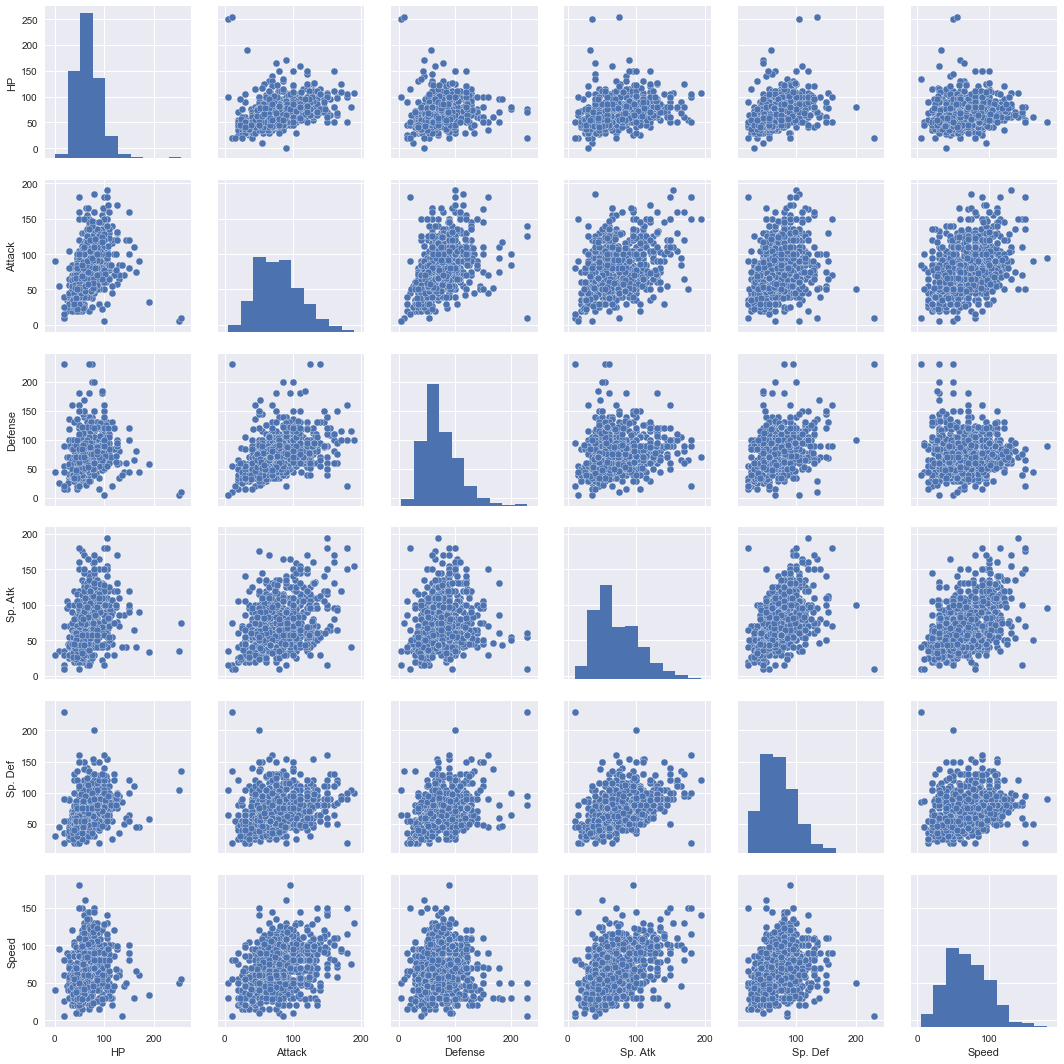

In [5]:
df = pd.read_csv("data sets/Pokemon.csv").drop("Total",axis=1).drop("Legendary",axis=1).drop("Generation",axis=1).drop("#",axis=1).drop("Type 2",axis=1)
df = df.drop("Name",axis=1)

#df["Type 1"].rank(axis=0)
# 這樣就可以給圖片一個編號了
plt.figure(36)
sns.pairplot(df)
# 儲存
plt.savefig("./Data Image/Pairplot",dpi=500)
# 不要忘記要加上show()才會顯示
plt.show()

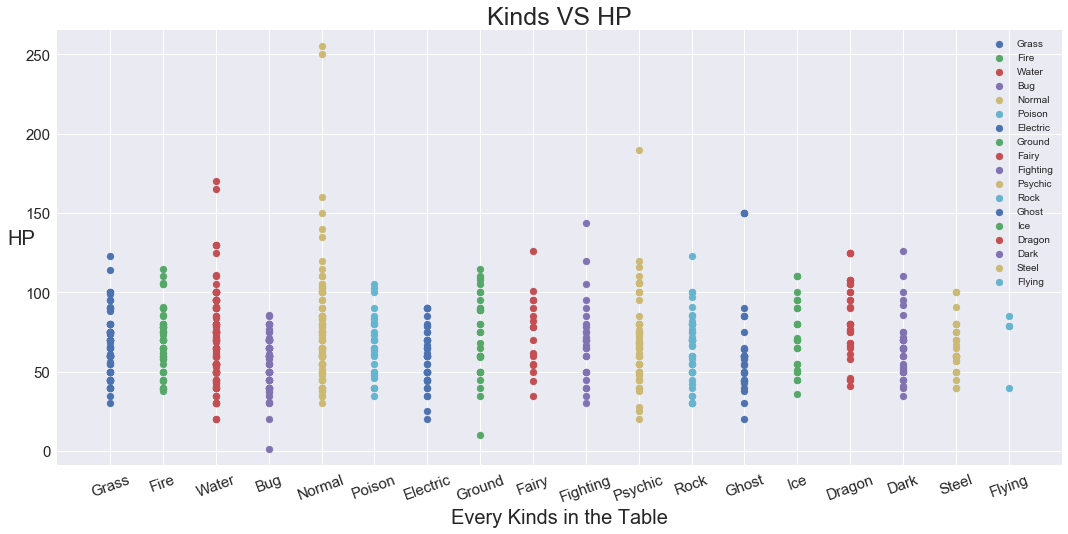

In [67]:
df = pd.read_csv("data sets/Pokemon.csv").drop("Total",axis=1).drop("Legendary",axis=1).drop("Generation",axis=1).drop("#",axis=1).drop("Type 2",axis=1)
df = df.drop("Name",axis=1)


kinds = df['Type 1'].unique()
HP = df['HP']


# 給圖片編號和大小
plt.figure(5,figsize=(18,8))
# 就是 title
plt.title("Kinds VS HP",fontdict={'fontsize':25})
# 可以設定 ticks 的文字參數
plt.tick_params(axis='both',labelsize=15)
# 讓兩旁多一點空間，設定 最小是0 最大是 陣列的長度
plt.xlim( ( 0-1, len(kinds) ) )
# 幫X軸放上我要的文字陣列
plt.xticks(xrange(len(kinds)),kinds,rotation=20)
# X軸 Label 的文字
plt.xlabel("Every Kinds in the Table",fontdict={'fontsize':20})

plt.ylim( (HP.min()-10,HP.max()+10) )
plt.ylabel("HP",fontdict={"fontsize":20},rotation=0)


for i,k in enumerate(kinds):
    Y = data_frame.loc[data_frame["Type 1"]==k]['HP']
    X = np.full((len(Y)),i,dtype=float)
    
    plt.scatter(x=X,y=Y,marker='o')




plt.legend(kinds,loc="upper right")
#plt.savefig("./Data Image/Kind_vs_HP_withAllkinds_300.jpg",dpi=300)
plt.show()


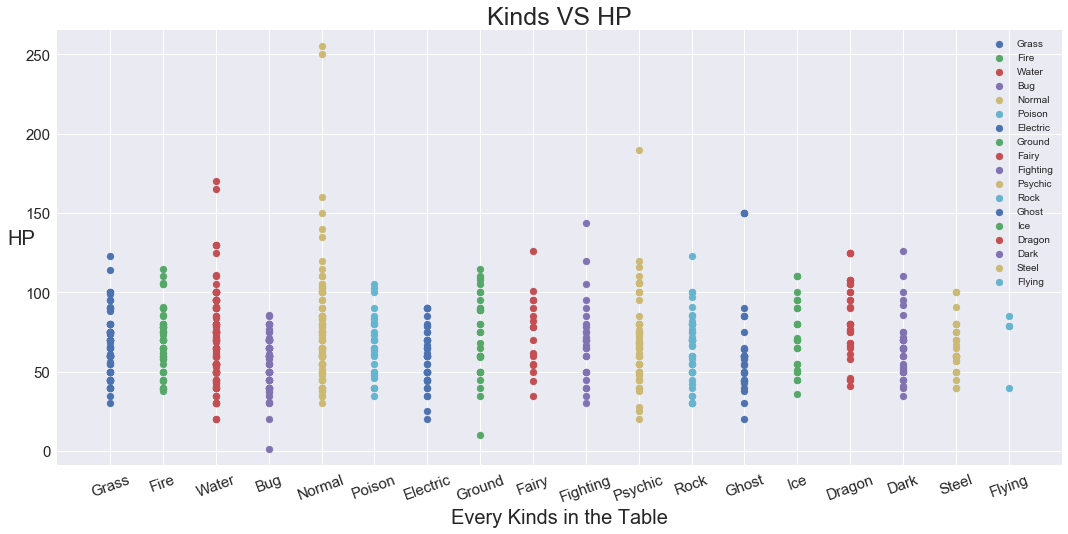

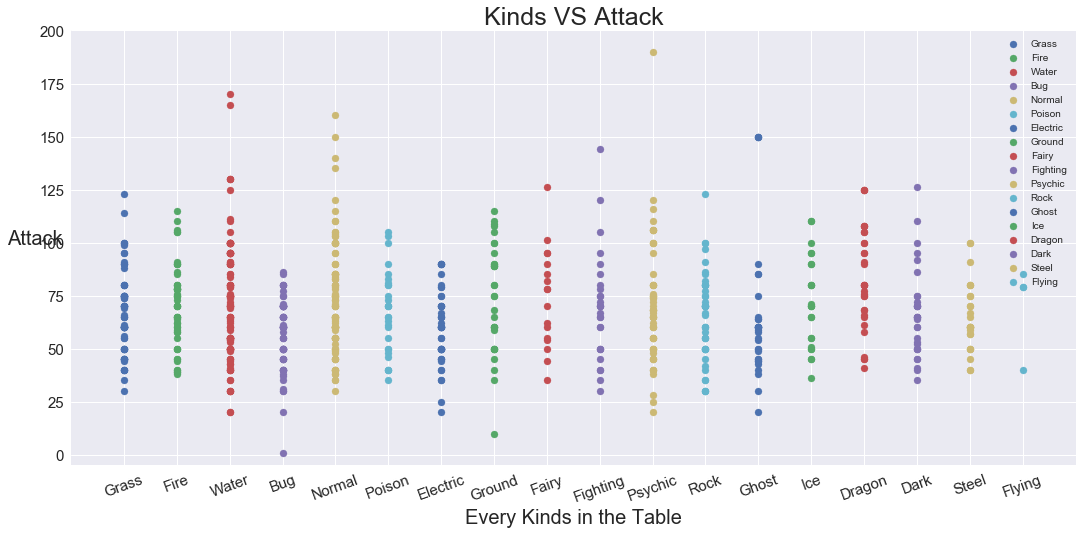

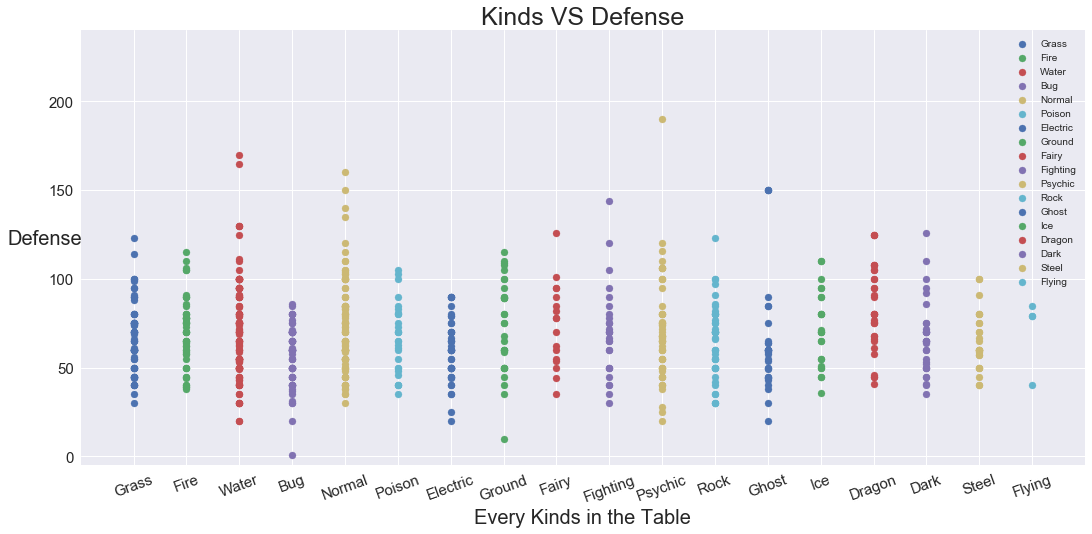

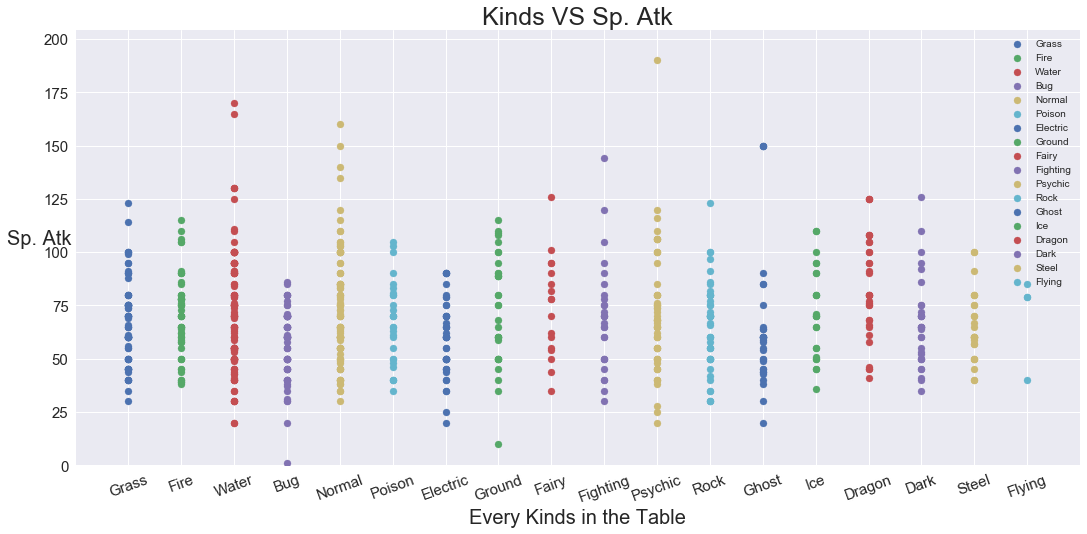

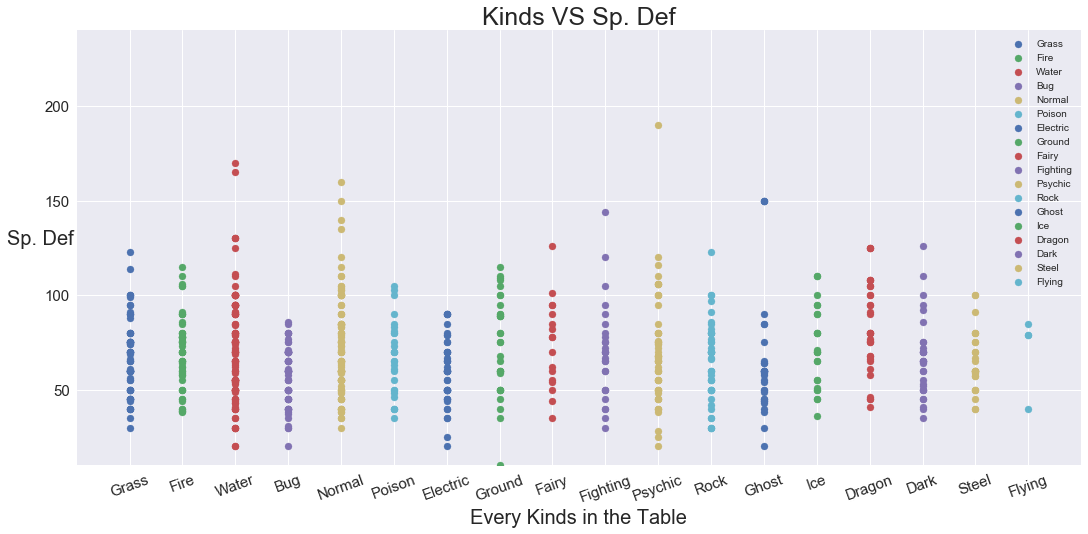

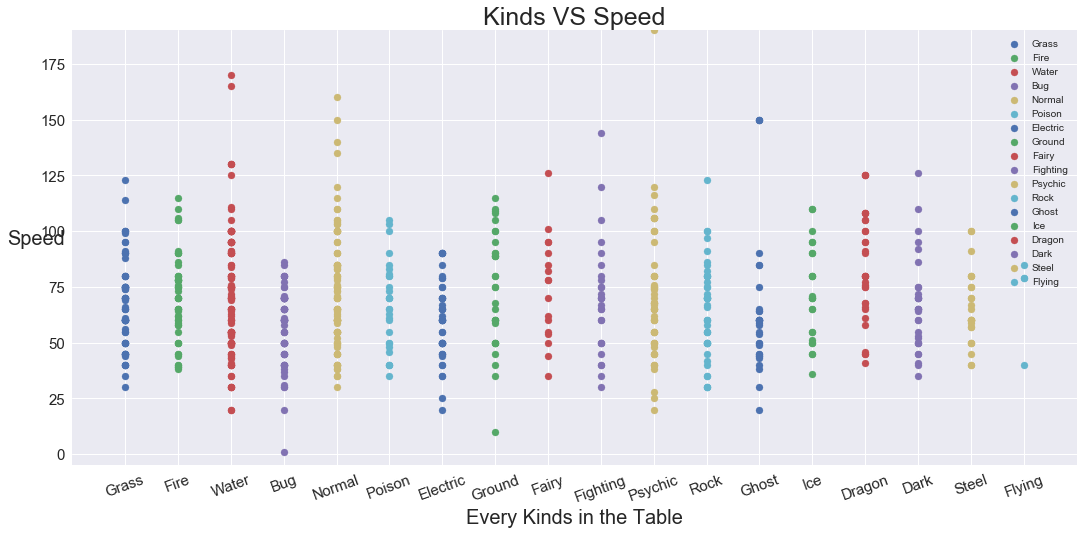

In [77]:
df = pd.read_csv("data sets/Pokemon.csv").drop("Total",axis=1).drop("Legendary",axis=1).drop("Generation",axis=1).drop("#",axis=1).drop("Type 2",axis=1)
df = df.drop("Name",axis=1)

attribute = list(df.columns[1:])
kinds = df['Type 1'].unique()

for fig_num,attr in enumerate(attribute):
    
    title_name = "Kinds VS " + str(attr)
    attr_sel = df[attr]
    
    
    plt.figure(fig_num+10,figsize=(18,8))
    plt.title(title_name,fontdict={'fontsize':25})
    plt.tick_params(axis='both',labelsize=15)
    plt.xlim( ( 0-1, len(kinds) ) )
    plt.xticks(xrange(len(kinds)),kinds,rotation=20)
    plt.xlabel("Every Kinds in the Table",fontdict={'fontsize':20})
    
    plt.ylim( (attr_sel.min()-10,attr_sel.max()+10) )
    plt.ylabel(attr,fontdict={"fontsize":20},rotation=0)
    
    for i,k in enumerate(kinds):
        Y = data_frame.loc[data_frame["Type 1"]==k]['HP']
        X = np.full((len(Y)),i,dtype=float)
        
        plt.scatter(x=X,y=Y,marker='o')

        
    plt.legend(kinds,loc="upper right")
    plt.savefig("./Data Image/All Kinds Scatter/Normal/"+str(attr)+".jpg",dpi=300)
    #plt.savefig("./Data Image/All Kinds Scatter/Average Line/"+str(attr)+".jpg",dpi=300)
    plt.show()


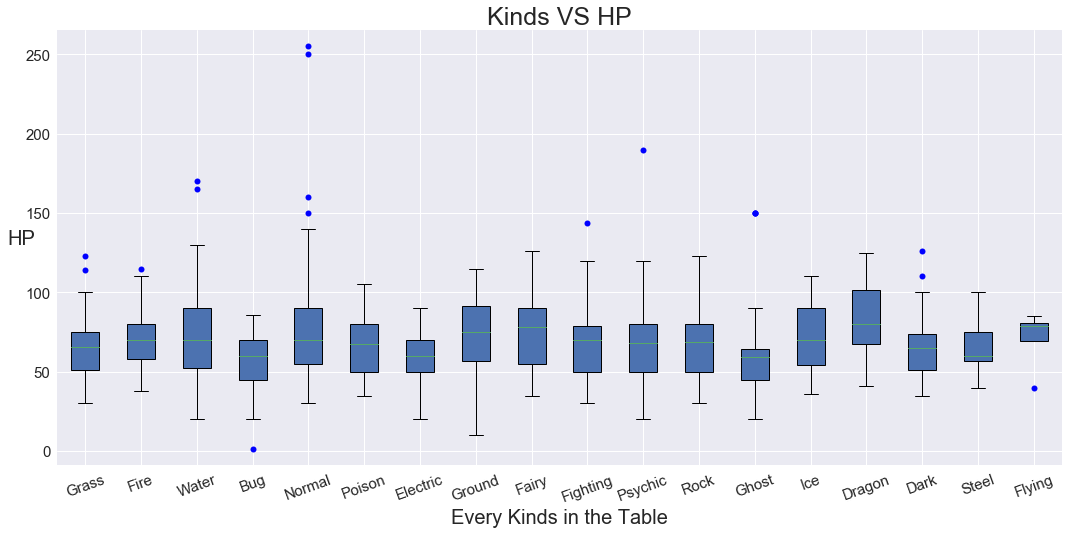

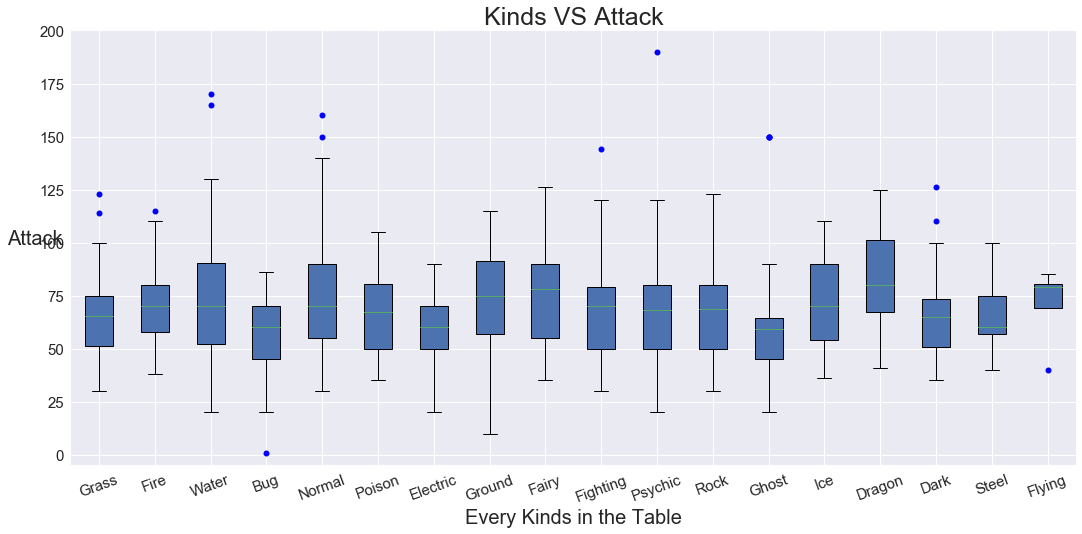

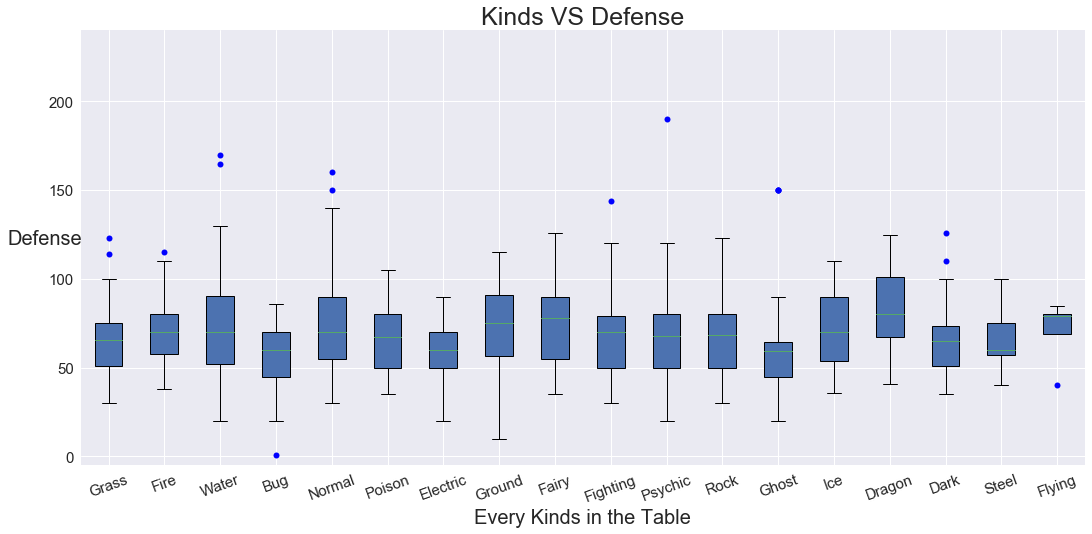

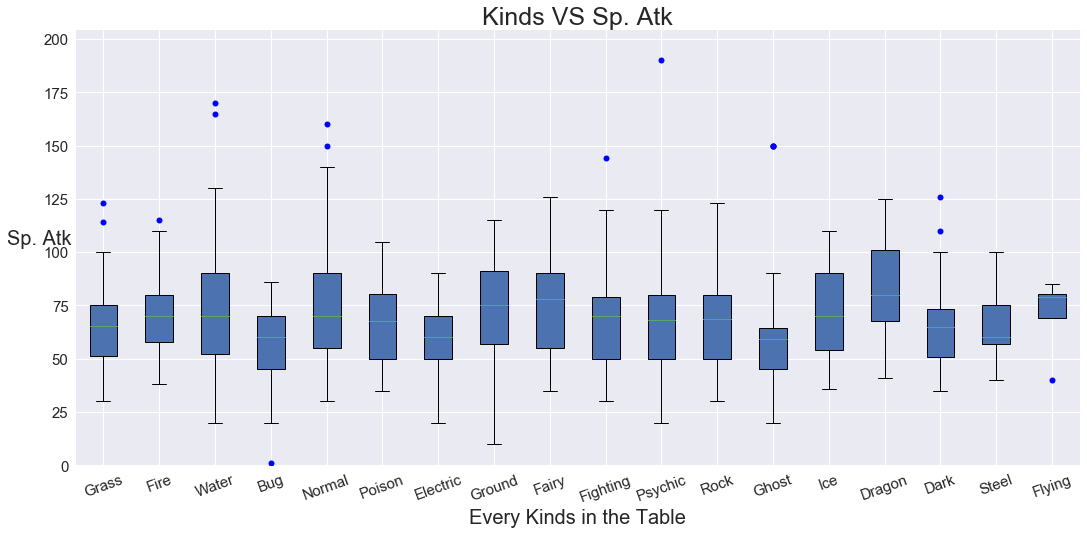

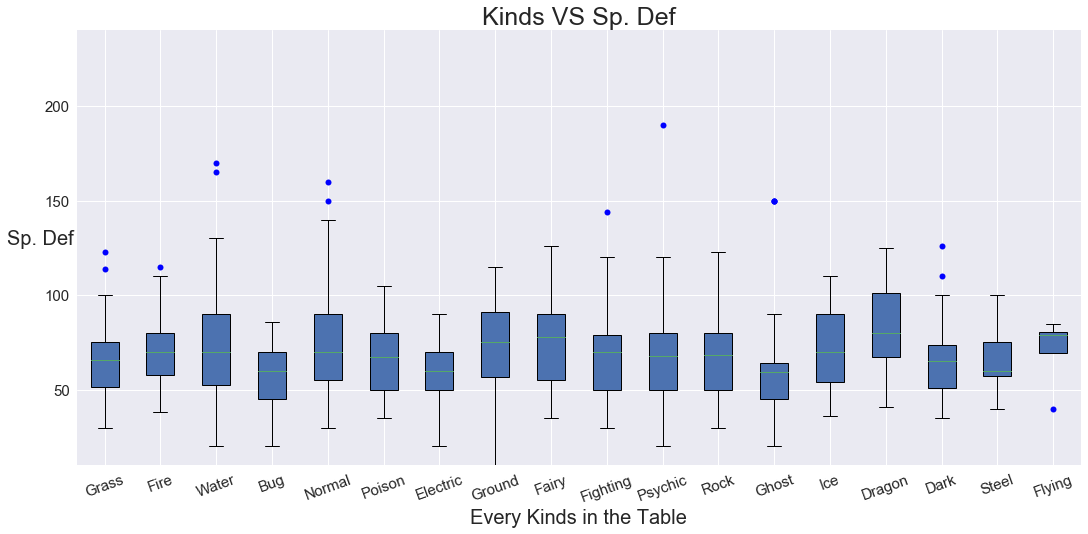

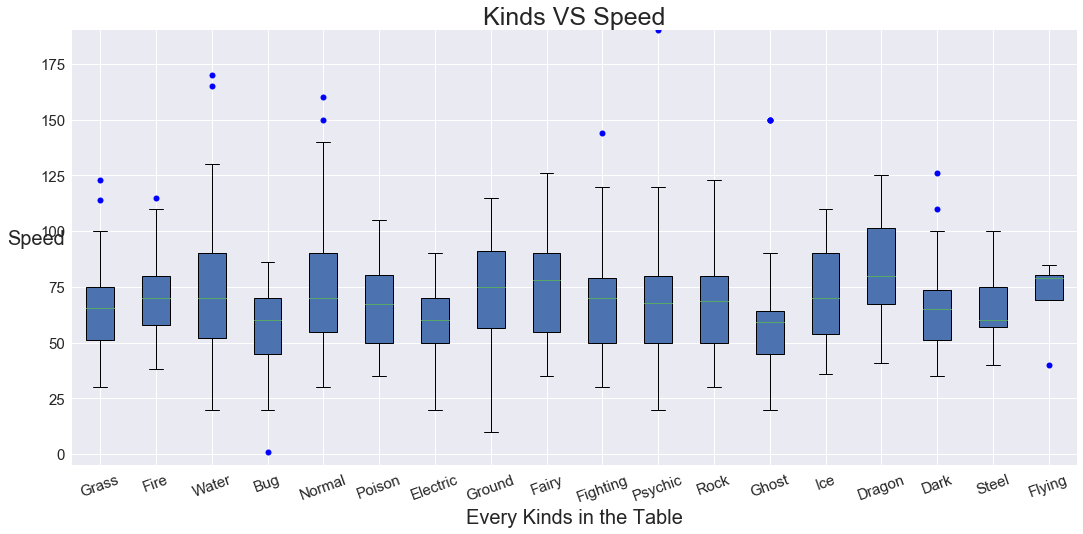

In [141]:
df = pd.read_csv("data sets/Pokemon.csv").drop("Total",axis=1).drop("Legendary",axis=1).drop("Generation",axis=1).drop("#",axis=1).drop("Type 2",axis=1)
df = df.drop("Name",axis=1)

attribute = list(df.columns[1:])
kinds = df['Type 1'].unique()

for fig_num,attr in enumerate(attribute):
    
    title_name = "Kinds VS " + str(attr)
    attr_sel = df[attr]
    
    plt.figure(fig_num+10,figsize=(18,8))
    plt.title(title_name,fontdict={'fontsize':25})
    plt.tick_params(axis='both',labelsize=15)
    plt.xlim( ( 0-1, len(kinds) ) )
    plt.xticks(xrange(len(kinds)),kinds,rotation=20)
    plt.xlabel("Every Kinds in the Table",fontdict={'fontsize':20})
    
    plt.ylim( (attr_sel.min()-10,attr_sel.max()+10) )
    plt.ylabel(attr,fontdict={"fontsize":20},rotation=0)
    
    
    X = np.full((len(Y)),i,dtype=float)
    All_to_plot = []
    for i,k in enumerate(kinds):
        Y = data_frame.loc[data_frame["Type 1"]==k]['HP']
        All_to_plot.append(Y)
        
    
    # 要加上 positions=xrange(0,len(kinds)) 因為它內建的是1開頭 所以要位移回來
    boxplt = plt.boxplot(All_to_plot,sym='ob',positions=xrange(0,len(kinds)),patch_artist=True)
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
    
    plt.xticks(xrange(0, len(kinds)),kinds,rotation=20)
    #plt.legend(kinds,loc="upper right")
    #plt.savefig("./Data Image/All Kinds Scatter/Normal/"+str(attr)+".jpg",dpi=300)
    plt.savefig("./Data Image/Average Line/"+str(attr)+".jpg",dpi=300)
    plt.show()

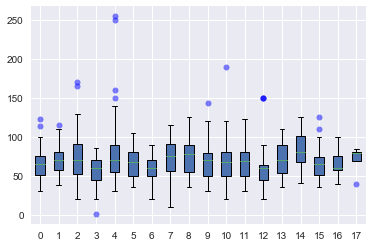

In [135]:
df = pd.read_csv("data sets/Pokemon.csv").drop("Total",axis=1).drop("Legendary",axis=1).drop("Generation",axis=1).drop("#",axis=1).drop("Type 2",axis=1)
df = df.drop("Name",axis=1)

attribute = list(df.columns[1:])
kinds = df['Type 1'].unique()

X = np.full((len(Y)),i,dtype=float)
All_to_plot = []

for i,k in enumerate(kinds):
    Y = data_frame.loc[data_frame["Type 1"]==k]['HP']
    All_to_plot.append(Y)
    
bp = plt.boxplot(All_to_plot,sym='ob',positions=xrange(0,len(kinds)),patch_artist=True)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
 
plt.show()